# Task 2: Analysing hospital 

**The task is to link the test dataset "Berlin Income" with hospital dataset of 2015 and calculate a bundle of descriptive statistical measures (Minimum, Maximum, Mean, Standard derivation) on bed numbers within a circle of 2 kilometers.**

## Load functions from SoRa R package
This steps are currently required to load all R functions from /R/ directory. In future, the SoRa R package will be installed directly.

In [1]:
# load R functions from SoRa R Package
path <- "/home/jovyan/R/"
sora_functions  <- dir(path)
for (i in sora_functions) {
  source(paste0(path, i))
}

## Check your changed SORA_API_KEY 
- the environment variable from .Renviron file


In [2]:
#check environment variable for SORA_API_KEY
Sys.getenv("SORA_API_KEY")

[1] "9448b1d9c90db35d8975c24f71c60ee0c2855ee6eaf92eea2a32c23f094331d4de6579c54e51b223658f6769939e64d1380b30f9805bfc9316bef9a7a3ef6217"

## Load, explore and prepare input survey data

Loading the test dataset "Berlin Income"

In [3]:
load("/home/jovyan/data/ber_income.rda")
head(ber_income)

,id,income,x,y
,<chr>,<ord>,<dbl>,<dbl>
1,ID_08939,4500-5000 €,4558400,3278000
2,ID_29396,3500-4000 €,4549700,3277800
3,ID_20257,2500-3000 €,4546200,3265100
4,ID_12550,3000-3500 €,4548100,3268000
5,ID_22042,4500-5000 €,4542700,3262900
6,ID_15074,3000-3500 €,4561600,3276700


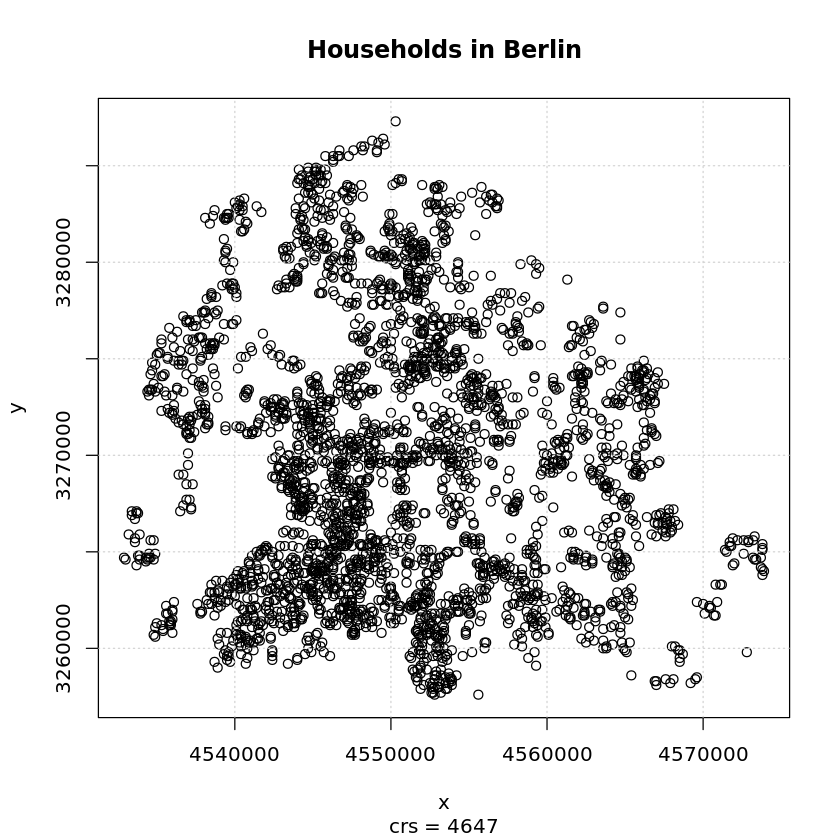

In [4]:
plot(ber_income$x, ber_income$y,
     xlab = "x", ylab = "y",
     main = "Households in Berlin",
     sub = "crs = 4647"
)
grid()

In [5]:
# load survey data and load its coordinate reference system (CRS) LAEA (EPSG Code: 3035)
survey_data <- sora_custom(.data = ber_income, crs = 3035)

### Linking
- hint: 
    - to determine the correct linking parameter, you can either use the online web-interface of the datapicker
    - or read the error messages (after starting a linking job), to get an idea which values are valid

In [6]:
# define geospatial dataset of hospitals (including bed numbers) in 2015
spat_data <- sora_spatial(id = "bkg-poi-bund-hos-beds-2015")

Fill in the missing linking parameter!

In [7]:

linking <- sora_linking(
  method = "aggregate_attribute",
  selection_area = "circle",
  radius = 2000,
  output = c("mean", "min", "max", "sd")
)

Start the linking job

In [8]:
job_id <- sora_request(dataset = survey_data, link_to = spat_data, method = linking)

→ The provided coordinates have unique identifiers and are in valid format.
→ The requested sora-provided geospatial dataset is existing.
→ Chosen geospatial dataset: Hospitals: number of beds (2015, points) from
  POI-Bund (BKG)
→ Chosen linkage: Aggregate attribute within circle on points with numeric
  field - Geocoded Dataset: Vector: Point | Geospatial Dataset: Vector: Point -
  numeric
→ The requested linkage is plausible and fits to the chosen geospatial dataset.
  All provided parameter are valid including its values.
→ Additional permissions to access the geospatial dataset is not required.
→ Total number of provided coordinates: 3000 (valid: 3000, having null values:
  0).
→ Number of coordinates located within the bounding box of geospatial dataset:
  3000 (outside: 0).
→ All required external services are available.


### Get linking result

Check if linking job is already finished

In [9]:
## check, if your current linking job is done
sora_job_done(job_id)

[1] TRUE

You can also get a list of all linking job with datetime of requesting, and current status, which are connected to your SORA_API_KEY

In [10]:
## check status of all your started linking jobs
sora_jobs()

job_id,created_at,status
<chr>,<dttm>,<chr>
IOER-3b530028-4f24-4495-9c70-7b2c63fce9e4,2025-06-27 14:12:51,SUCCESSFUL
IOER-e5bb2fce-6aa1-4d6f-816e-95b74db761bc,2025-06-27 14:03:39,SUCCESSFUL
IOER-f3555b01-d49d-4967-a491-86f13375c524,2025-06-27 14:01:11,SUCCESSFUL
IOER-404b72ca-fb78-45f6-a52d-28015822fab8,2025-06-27 13:35:35,SUCCESSFUL
IOER-5e2bab40-c2af-4cb4-bca5-c92eb6ab7982,2025-06-27 13:35:18,SUCCESSFUL
IOER-dd92aa8a-ddad-4b1f-862c-dd9fa3973cdd,2025-06-27 12:58:17,SUCCESSFUL
IOER-65c1f03b-a206-464b-9c71-d934da3cc9bf,2025-06-27 12:55:08,SUCCESSFUL
IOER-6c479c87-768b-4c7e-8b79-7009a326a9a3,2025-06-27 11:16:55,SUCCESSFUL
IOER-ed12bebd-e1b1-414b-9e9c-0dc6df55d655,2025-06-27 11:15:29,SUCCESSFUL


**If your linking job is finished, you can get the result data**

In [11]:
## get results
sora_calls <- sora_jobs()
job_id <- sora_calls$job_id[1]

if (sora_job_done(job_id)){
  results <- sora_results(job_id = job_id)

  ## print first rows of result
  head(results)
}

→ The requested linkage was successfully executed.


id,area,min,max,mean,sd,count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ID_08939,12485781,NA,NA,NA,NA,0
ID_29396,12485781,2,305,179.750000,116.718411,4
ID_20257,12485781,2,7,3.666667,2.357023,3
ID_12550,12485781,4,572,260.000000,223.212903,4
ID_22042,12485781,60,492,276.000000,216.000000,2
ID_15074,12485781,NA,NA,NA,NA,0


Merge the result data with input Berlin Income dataset, to analyse income and spatial attributes from the linking.

In [12]:
#merge input survey data and result
linked <- merge(ber_income, results, by="id")
head(linked)

,id,income,x,y,area,min,max,mean,sd,count
,<chr>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,ID_00027,3500-4000 €,4552100,3274500,12485781,146,653,399.5000,253.5000,2
2,ID_00035,3500-4000 €,4553400,3274500,12485781,146,789,529.3333,276.6855,3
3,ID_00036,2500-3000 €,4544500,3270000,12485781,12,275,100.6667,123.2784,3
4,ID_00037,4000-4500 €,4547700,3274000,12485781,194,194,194.0000,0.0000,1
5,ID_00061,3500-4000 €,4549300,3274800,12485781,190,2888,1090.6667,1270.9076,3
6,ID_00065,3500-4000 €,4562000,3264900,12485781,NA,NA,NA,NA,0


### Analyse 

Draw a simple plot, showing income and average number of hospital beds:

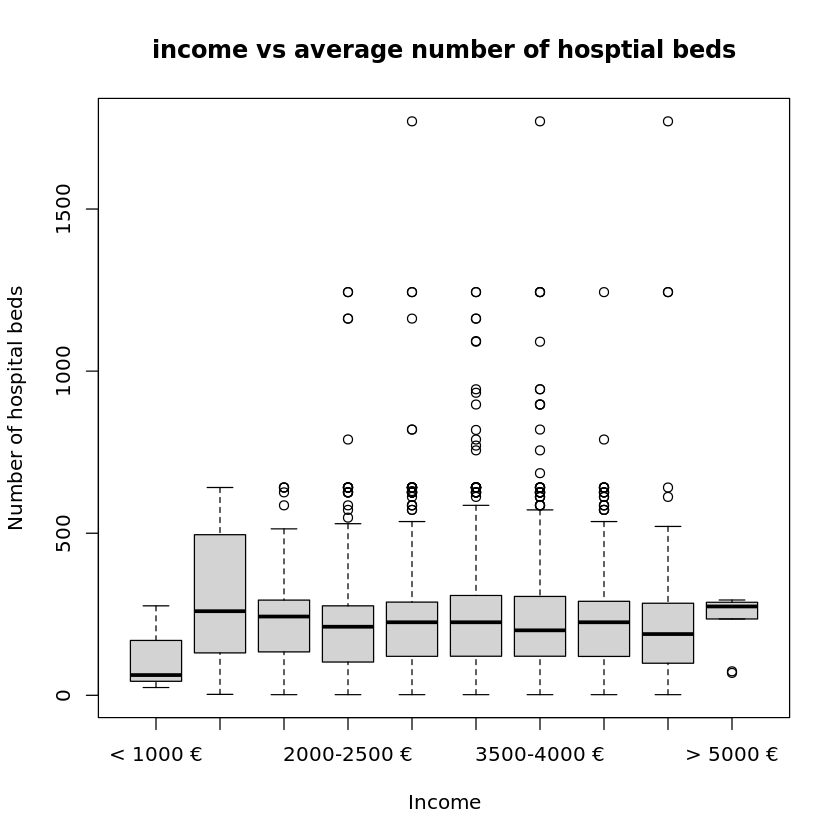

In [13]:
plot(linked$income, linked$mean, type = "p", main = "income vs average number of hosptial beds", xlab = "Income", ylab = "Number of hospital beds")

We could assume, that the living location of people which higher income has a bigger distance to hospitals then people with lower income.